# W266 Project

### Adam Sayre & Erin Werner

## CNN Model

In [1]:
import numpy as np
import csv
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import importlib
import emoji
import tensorflow as tf
import nltk
import re
from nltk.corpus import brown
nltk.download('stopwords')
from nltk.corpus import stopwords
assert(nltk.download("treebank"))
from nltk.corpus import europarl_raw
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erinwerner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/erinwerner/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [4]:
from pickle import load
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model

In [5]:
data = pd.read_csv("~/Downloads/dataset(clean).csv") 
data.head()

,Emotion,Content,Original Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t..."
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...


In [6]:
data_e = pd.read_csv("~/Downloads/dataset(clean)_e.csv") 
data_e.head()[['Emotion','Content','Original Content','E_Content']]

,Emotion,Content,Original Content,E_Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...,rt usertaginstance usertaginstance oh fuck wro...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...,feeling little bit defeated steps faith would ...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t...",usertaginstance imagine reaction guy called jj...
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...,wouldnt feel burdened would live life testamen...


In [7]:
data_a = pd.read_csv("~/Downloads/dataset(clean)_a.csv") 
data_a.head()[['Emotion','Content','Original Content','A_Content']]

,Emotion,Content,Original Content,A_Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...,b rt davbingodav mcrackins oh fuck wrote fil g...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...,feeling little bit defeated steps faith would ...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t...",b ksiolajidebt imagine reaction guy called jj ...
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...,wouldnt feel burdened would live life testamen...


In [8]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

### Shallow CNN

#### Original Cleaned Data

In [41]:
possible_labels = data.Emotion.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'disappointed': 0, 'happy': 1, 'angry': 2}

In [42]:
data['label'] = data.Emotion.replace(label_dict)

In [48]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(data.Content.values, data.label.values, test_size=0.5, 
                                                  random_state=42, stratify=data.label.values)

X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(X_train_c, y_train_c, test_size=0.5, 
                                                  random_state=42, stratify=y_train_c)

In [49]:
vectorizer_c = CountVectorizer()
vectorizer_c.fit(X_train_c)

X_train_c = vectorizer_c.transform(X_train_c)
X_val_c  = vectorizer_c.transform(X_val_c)
X_train_c

<229143x75483 sparse matrix of type '<class 'numpy.int64'>'
	with 2578853 stored elements in Compressed Sparse Row format>

In [55]:
input_dim = X_train_c.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                754840    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 756,771
Trainable params: 756,771
Non-trainable params: 0
_________________________________________________________________


In [57]:
clear_session()
history = model.fit(X_train_c, y_train_c,epochs=5,verbose=False,
                     validation_data=(X_val_c, y_val_c),batch_size=10)

In [58]:
cnn_loss_c, cnn_accuracy_c = model.evaluate(X_train_c, y_train_c, verbose=False)
print("Training Accuracy: {:.4f}".format(cnn_accuracy_c))
cnn_loss_c_val, cnn_accuracy_c_val = model.evaluate(X_val_c, y_val_c, verbose=False)
print("Validation Accuracy:  {:.4f}".format(cnn_accuracy_c_val))

Training Accuracy: 0.4396
Validation Accuracy:  0.4377


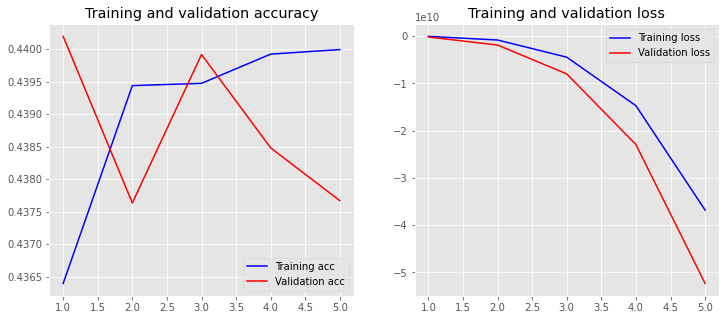

In [59]:
plot_history(history)

7161/7161 [==============================] - 3s 432us/step


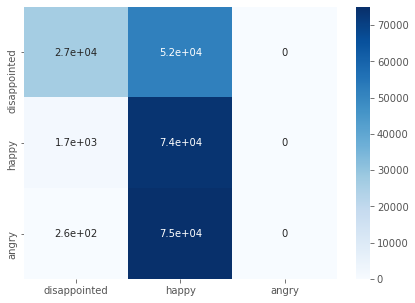

In [60]:
y_pred_c = model.predict(X_val_c, verbose=1)
#y_pred_c = y_pred_c.argmax(axis=-1)
cm_c = confusion_matrix(y_val_c, y_pred_c)
plt.figure(figsize=(7,5))
sn.heatmap(cm_c, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels, yticklabels=possible_labels)

#### Original Uncleaned Data

In [61]:
data["Original_Content"] = data["Original Content"]

In [62]:
X_train_oc, X_val_oc, y_train_oc, y_val_oc = train_test_split(data.Original_Content.values, data.label.values, 
                                                  test_size=0.5, random_state=42, stratify=data.label.values)

X_train_oc, X_val_oc, y_train_oc, y_val_oc = train_test_split(X_train_oc, y_train_oc, test_size=0.5, 
                                                  random_state=42, stratify=y_train_oc)

In [63]:
vectorizer_oc = CountVectorizer()
vectorizer_oc.fit(X_train_oc)

X_train_oc = vectorizer_oc.transform(X_train_oc)
X_val_oc  = vectorizer_oc.transform(X_val_oc)
X_train_oc

<229143x218684 sparse matrix of type '<class 'numpy.int64'>'
	with 2872973 stored elements in Compressed Sparse Row format>

In [84]:
input_dim = X_train_oc.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                2186850   
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,188,781
Trainable params: 2,188,781
Non-trainable params: 0
_________________________________________________________________


In [85]:
clear_session()
history = model.fit(X_train_oc, y_train_oc,epochs=5,verbose=False,
                     validation_data=(X_val_oc, y_val_oc),batch_size=10)

Training Accuracy: 0.4374
Validation Accuracy:  0.4349


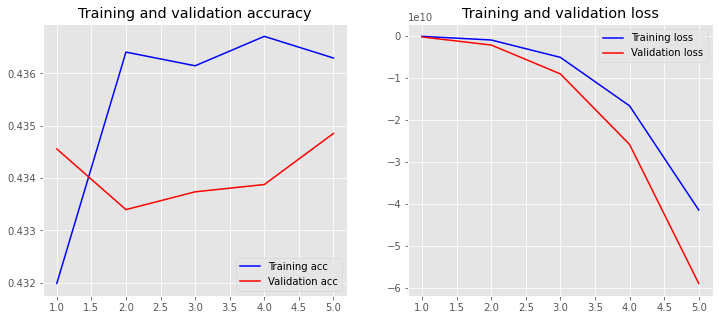

In [86]:
cnn_loss_oc, cnn_accuracy_oc = model.evaluate(X_train_oc, y_train_oc, verbose=False)
print("Training Accuracy: {:.4f}".format(cnn_accuracy_oc))
cnn_loss_oc_val, cnn_accuracy_oc_val = model.evaluate(X_val_oc, y_val_oc, verbose=False)
print("Validation Accuracy:  {:.4f}".format(cnn_accuracy_oc_val))

plot_history(history)

7161/7161 [==============================] - 3s 468us/step


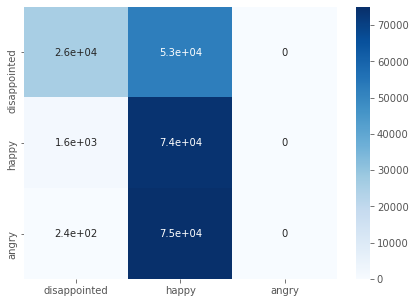

In [87]:
y_pred_oc = model.predict(X_val_oc, verbose=1)
cm_oc = confusion_matrix(y_val_oc, y_pred_oc)
plt.figure(figsize=(7,5))
sn.heatmap(cm_oc, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels, yticklabels=possible_labels)

#### Custom Cleaned Data #1

In [67]:
possible_labels_e = data_e.Emotion.unique()

label_dict_e = {}
for index, possible_label in enumerate(possible_labels_e):
    label_dict_e[possible_label] = index

data_e['label'] = data_e.Emotion.replace(label_dict_e)

In [68]:
X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(data_e.E_Content.values, data_e.label.values, 
                                                  test_size=0.5,random_state=42, stratify=data_e.label.values)

X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(X_train_e, y_train_e, test_size=0.5, 
                                                  random_state=42, stratify=y_train_e)

In [69]:
vectorizer_e = CountVectorizer()
vectorizer_e.fit(X_train_e)

X_train_e = vectorizer_e.transform(X_train_e)
X_val_e  = vectorizer_e.transform(X_val_e)
X_train_e

<229143x122039 sparse matrix of type '<class 'numpy.int64'>'
	with 2015462 stored elements in Compressed Sparse Row format>

In [70]:
input_dim = X_train_e.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                1220400   
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 1,222,331
Trainable params: 1,222,331
Non-trainable params: 0
_________________________________________________________________


In [71]:
clear_session()
history = model.fit(X_train_e, y_train_e,epochs=5,verbose=False,
                     validation_data=(X_val_e, y_val_e),batch_size=10)

Training Accuracy: 0.4320
Validation Accuracy:  0.4275


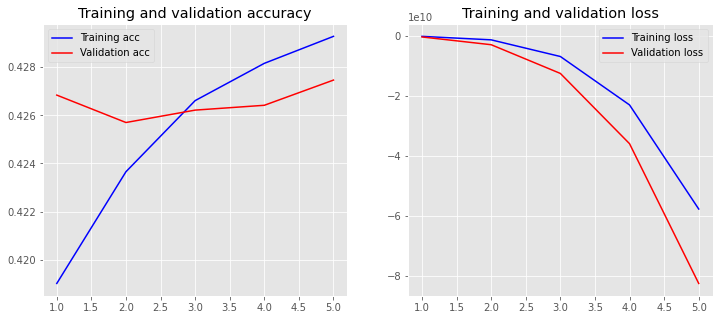

In [72]:
cnn_loss_e, cnn_accuracy_e = model.evaluate(X_train_e, y_train_e, verbose=False)
print("Training Accuracy: {:.4f}".format(cnn_accuracy_e))
cnn_loss_e_val, cnn_accuracy_e_val = model.evaluate(X_val_e, y_val_e, verbose=False)
print("Validation Accuracy:  {:.4f}".format(cnn_accuracy_e_val))

plot_history(history)

7161/7161 [==============================] - 3s 420us/step


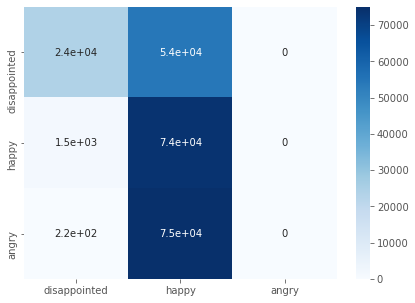

In [73]:
y_pred_e = model.predict(X_val_e, verbose=1)
cm_e = confusion_matrix(y_val_e, y_pred_e)
plt.figure(figsize=(7,5))
sn.heatmap(cm_e, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels_e, yticklabels=possible_labels_e)

#### Custom Cleaned Data #2

In [74]:
possible_labels_a = data_a.Emotion.unique()

label_dict_a = {}
for index, possible_label in enumerate(possible_labels_a):
    label_dict_a[possible_label] = index

data_a['label'] = data_a.Emotion.replace(label_dict_a)

In [75]:
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(data_a.A_Content.values, data_a.label.values, 
                                                  test_size=0.5,random_state=42, stratify=data_a.label.values)

X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.5, 
                                                  random_state=42, stratify=y_train_a)

In [76]:
vectorizer_a = CountVectorizer()
vectorizer_a.fit(X_train_a)

X_train_a = vectorizer_a.transform(X_train_a)
X_val_a  = vectorizer_a.transform(X_val_a)
X_train_a

<229143x211227 sparse matrix of type '<class 'numpy.int64'>'
	with 2068822 stored elements in Compressed Sparse Row format>

In [77]:
input_dim = X_train_a.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                2112280   
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,114,211
Trainable params: 2,114,211
Non-trainable params: 0
_________________________________________________________________


In [78]:
clear_session()
history = model.fit(X_train_a, y_train_a,epochs=5,verbose=False,
                     validation_data=(X_val_a, y_val_a),batch_size=10)

Training Accuracy: 0.4806
Validation Accuracy:  0.4761


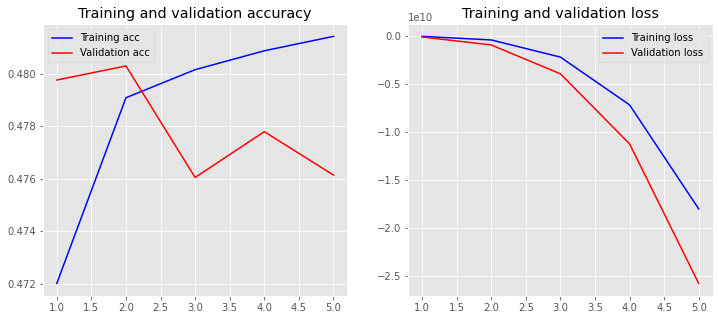

In [79]:
cnn_loss_a, cnn_accuracy_a = model.evaluate(X_train_a, y_train_a, verbose=False)
print("Training Accuracy: {:.4f}".format(cnn_accuracy_a))
cnn_loss_a_val, cnn_accuracy_a_val = model.evaluate(X_val_a, y_val_a, verbose=False)
print("Validation Accuracy:  {:.4f}".format(cnn_accuracy_a_val))

plot_history(history)

7161/7161 [==============================] - 3s 456us/step


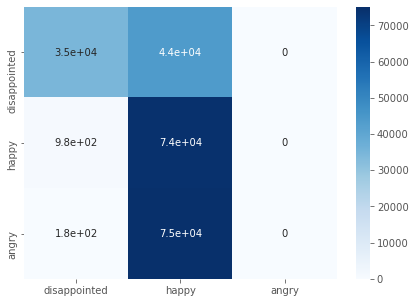

In [80]:
y_pred_a = model.predict(X_val_a, verbose=1)
cm_a = confusion_matrix(y_val_a, y_pred_a)
plt.figure(figsize=(7,5))
sn.heatmap(cm_a, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels_a, yticklabels=possible_labels_a)

#### Results

In [88]:
scnn_acc_train = [cnn_accuracy_oc, cnn_accuracy_c, cnn_accuracy_e, cnn_accuracy_a]
scnn_loss_train = [cnn_loss_oc, cnn_loss_c, cnn_loss_e, cnn_loss_a]
scnn_acc_val = [cnn_accuracy_oc_val, cnn_accuracy_c_val, cnn_accuracy_e_val, cnn_accuracy_a_val]
scnn_loss_val = [cnn_loss_oc_val, cnn_loss_c_val, cnn_loss_e_val, cnn_loss_a_val]
scnn_values = ['Orig. Uncleaned', 'Orig. Cleaned', 'Custom Cleaned #1', 'Custom Cleaned #2']
scnn_df = pd.DataFrame()
scnn_df['Cleaning Method'] = scnn_values
scnn_df['Training F1 Score'] = scnn_acc_train
scnn_df['Training Loss'] = scnn_loss_train
scnn_df['Validation F1 Score'] = scnn_acc_val
scnn_df['Validation Loss'] = scnn_loss_val
scnn_df

,Cleaning Method,Training F1 Score,Training Loss,Validation F1 Score,Validation Loss
0,Orig. Uncleaned,0.437378,-6.010943e+10,0.434853,-5.902012e+10
1,Orig. Cleaned,0.439616,-5.318089e+10,0.437668,-5.234455e+10
2,Custom Cleaned #1,0.431979,-8.354585e+10,0.427465,-8.250919e+10
3,Custom Cleaned #2,0.480565,-2.623733e+10,0.476133,-2.577669e+10


### Deep CNN 

In [13]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [14]:
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = layers.Input(shape=(length,))
    embedding1 = layers.Embedding(vocab_size, 100)(inputs1)
    conv1 = layers.Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = layers.Dropout(0.5)(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2)(drop1)
    flat1 = layers.Flatten()(pool1)
    # channel 2
    inputs2 = layers.Input(shape=(length,))
    embedding2 = layers.Embedding(vocab_size, 100)(inputs2)
    conv2 = layers.Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = layers.Dropout(0.5)(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2)(drop2)
    flat2 = layers.Flatten()(pool2)
    # channel 3
    inputs3 = layers.Input(shape=(length,))
    embedding3 = layers.Embedding(vocab_size, 100)(inputs3)
    conv3 = layers.Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = layers.Dropout(0.5)(conv3)
    pool3 = layers.MaxPooling1D(pool_size=2)(drop3)
    flat3 = layers.Flatten()(pool3)
    # merge
    merged = layers.concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = layers.Dense(10, activation='relu')(merged)
    outputs = layers.Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    print(model.summary())
    #plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

#### Original Cleaned Data

In [15]:
X_train_tc, X_val_tc, y_train_tc, y_val_tc = train_test_split(data.Content.values, data.label.values, test_size=0.99, 
                                                  random_state=42, stratify=data.label.values)

X_train_tc, X_val_tc, y_train_tc, y_val_tc = train_test_split(X_train_tc, y_train_tc, test_size=0.5, 
                                                  random_state=42, stratify=y_train_tc)

In [16]:
# create tokenizer
tokenizer = create_tokenizer(X_train_tc)
# calculate max document length
length = max_length(X_train_tc)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)

# encode data
trainX_tc = encode_text(tokenizer, X_train_tc, length)
valX_tc = encode_text(tokenizer, X_val_tc, length)
print(trainX_tc.shape, valX_tc.shape)

Max document length: 92
Vocabulary size: 7504
(4582, 92) (4583, 92)


In [17]:
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX_tc,trainX_tc,trainX_tc], y_train_tc, epochs=10, batch_size=10)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 92)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 92)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 92)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 92, 100)      750400      input_1[0][0]                    
______________________________________________________________________________________________

In [18]:
dcnn_loss_tc, dcnn_accuracy_tc = model.evaluate([valX_tc,valX_tc,valX_tc], y_val_tc, verbose=False)

144/144 [==============================] - 1s 3ms/step


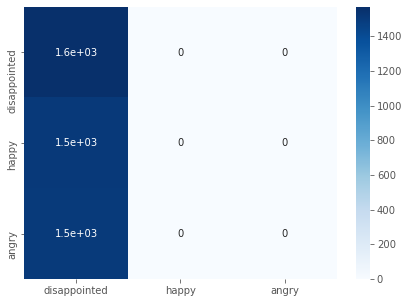

In [23]:
y_pred_c = model.predict([valX_tc,valX_tc,valX_tc], verbose=1)
y_pred_c = y_pred_c.argmax(axis=-1)
cm_c = confusion_matrix(y_val_tc, y_pred_c)
plt.figure(figsize=(7,5))
sn.heatmap(cm_c, annot=True, cmap=plt.cm.Blues, xticklabels=possible_labels, yticklabels=possible_labels)

#### Original Uncleaned Data

In [74]:
X_train_toc, X_val_toc, y_train_toc, y_val_toc = train_test_split(data.Original_Content.values, 
                                                  data.label.values, test_size=0.3, 
                                                  random_state=42, stratify=data.label.values)

#X_train_toc, X_val_toc, y_train_toc, y_val_toc = train_test_split(X_train_toc, y_train_toc, test_size=0.5, 
#                                                  random_state=42, stratify=y_train_toc)

In [75]:
# create tokenizer
tokenizer = create_tokenizer(X_train_toc)
# calculate max document length
length = max_length(X_train_toc)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)

# encode data
trainX_toc = encode_text(tokenizer, X_train_toc, length)
valX_toc = encode_text(tokenizer, X_val_toc, length)
print(trainX_toc.shape, valX_toc.shape)

Max document length: 59
Vocabulary size: 20405
(9165, 59) (9166, 59)


In [76]:
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX_toc,trainX_toc,trainX_toc], y_train_toc, epochs=10, batch_size=10)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 59)]         0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 59)]         0                                            
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 59)]         0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 59, 100)      2040500     input_16[0][0]                   
____________________________________________________________________________________________

In [77]:
dcnn_loss_toc, dcnn_accuracy_toc = model.evaluate([valX_toc,valX_toc,valX_toc], y_val_toc, verbose=False)

#### Custom Cleaned Data #1

In [78]:
X_train_te, X_val_te, y_train_te, y_val_te = train_test_split(data_e.E_Content.values, 
                                                  data_e.label.values, test_size=0.3, 
                                                  random_state=42, stratify=data_e.label.values)

#X_train_te, X_val_te, y_train_te, y_val_te = train_test_split(X_train_te, y_train_te, test_size=0.5, 
#                                                  random_state=42, stratify=y_train_te)

In [79]:
# create tokenizer
tokenizer = create_tokenizer(X_train_te)
# calculate max document length
length = max_length(X_train_te)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)

# encode data
trainX_te = encode_text(tokenizer, X_train_te, length)
valX_te = encode_text(tokenizer, X_val_te, length)
print(trainX_te.shape, valX_te.shape)

Max document length: 243
Vocabulary size: 14409
(9165, 243) (9166, 243)


In [80]:
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX_te,trainX_te,trainX_te], y_train_te, epochs=10, batch_size=10)

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 243)]        0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 243)]        0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 243)]        0                                            
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 243, 100)     1440900     input_19[0][0]                   
____________________________________________________________________________________________

In [81]:
dcnn_loss_te, dcnn_accuracy_te = model.evaluate([valX_te,valX_te,valX_te], y_val_te, verbose=False)

#### Custom Cleaned Data #2

In [82]:
X_train_ta, X_val_ta, y_train_ta, y_val_ta = train_test_split(data_a.A_Content.values, 
                                                  data_a.label.values, test_size=0.3, 
                                                  random_state=42, stratify=data_a.label.values)

#X_train_ta, X_val_ta, y_train_ta, y_val_ta = train_test_split(X_train_ta, y_train_ta, test_size=0.5, 
#                                                  random_state=42, stratify=y_train_ta)

In [83]:
# create tokenizer
tokenizer = create_tokenizer(X_train_ta)
# calculate max document length
length = max_length(X_train_ta)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Max document length: %d' % length)
print('Vocabulary size: %d' % vocab_size)

# encode data
trainX_ta = encode_text(tokenizer, X_train_ta, length)
valX_ta = encode_text(tokenizer, X_val_ta, length)
print(trainX_ta.shape, valX_ta.shape)

Max document length: 244
Vocabulary size: 19480
(9165, 244) (9166, 244)


In [84]:
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX_ta,trainX_ta,trainX_ta], y_train_ta, epochs=10, batch_size=10)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 244)]        0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           [(None, 244)]        0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 244)]        0                                            
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 244, 100)     1948000     input_22[0][0]                   
____________________________________________________________________________________________

In [85]:
dcnn_loss_ta, dcnn_accuracy_ta = model.evaluate([valX_ta,valX_ta,valX_ta], y_val_ta, verbose=False)

#### Results

In [86]:
dcnn_acc_train = [dcnn_accuracy_toc, dcnn_accuracy_tc, dcnn_accuracy_te, dcnn_accuracy_ta]
dcnn_loss_train = [dcnn_loss_toc, dcnn_loss_tc, dcnn_loss_te, dcnn_loss_ta]
dcnn_values = ['Orig. Uncleaned', 'Orig. Cleaned', 'Custom Cleaned #1', 'Custom Cleaned #2']
dcnn_df = pd.DataFrame()
dcnn_df['Cleaning Method'] = dcnn_values
dcnn_df['F1 Score'] = dcnn_acc_train
dcnn_df['Loss'] = dcnn_loss_train
dcnn_df

,Cleaning Method,F1 Score,Loss
0,Orig. Uncleaned,0.329369,-7.370033e+04
1,Orig. Cleaned,0.329260,-1.626010e+02
2,Custom Cleaned #1,0.329806,-9.349309e+04
3,Custom Cleaned #2,0.336461,-4.222868e+07
